# Doc Scanner

In [2]:
import src.scan as scan

### Escaner


In [3]:
scanner = scan.DocScanner()

In [4]:
scanner.scan("./partitura.jpg")

Proccessed partitura.jpg


# Sheet Scaner

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

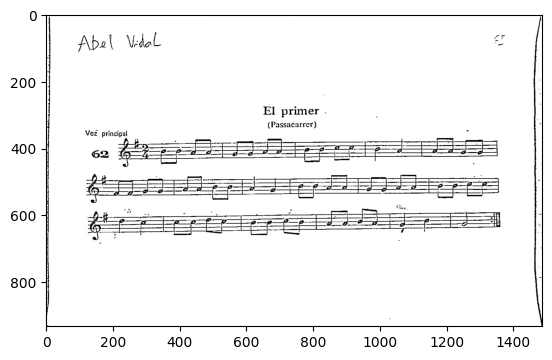

In [6]:
img = cv2.imread("./scaned/partitura.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

127.0


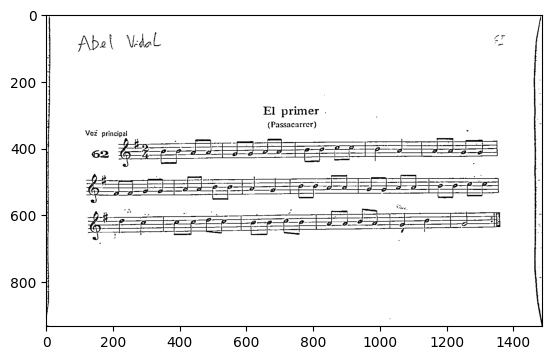

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_bw = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(img_bw, cmap="gray")
print(ret)

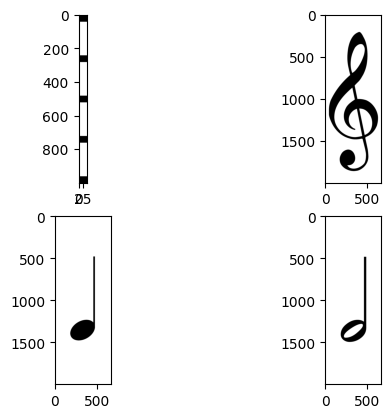

In [8]:
staff_img = cv2.cvtColor(cv2.imread("./png/staff_.png"), cv2.COLOR_BGR2GRAY)
Gclef_img = cv2.cvtColor(cv2.imread("./png/Gclef_.png"), cv2.COLOR_BGR2GRAY)
negra_img = cv2.cvtColor(cv2.imread("./png/negra_.png"), cv2.COLOR_BGR2GRAY)
blanca_img = cv2.cvtColor(cv2.imread("./png/blanca_.png"), cv2.COLOR_BGR2GRAY)

plt.subplot(221)
plt.imshow(staff_img, cmap="gray")
plt.subplot(222)
plt.imshow(Gclef_img, cmap="gray")
plt.subplot(223)
plt.imshow(negra_img, cmap="gray")
plt.subplot(224)
plt.imshow(blanca_img, cmap="gray")

In [9]:
np.unique(cv2.cvtColor(cv2.imread("./png/staff_.png"), cv2.COLOR_BGR2GRAY))

array([  0, 255], dtype=uint8)

In [12]:
staff_img.shape

(1000, 50)

[ 3 63]


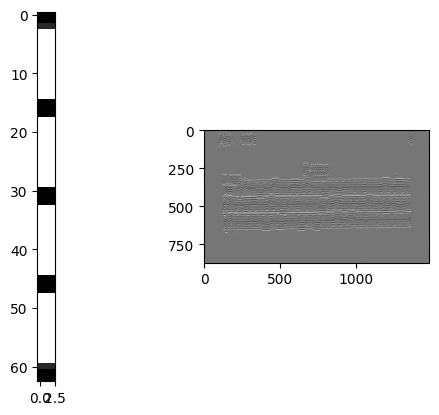

In [31]:
temp_size = np.array((1,21))*3
print(temp_size)
template = cv2.resize(staff_img, temp_size, interpolation = cv2.INTER_CUBIC)
plt.subplot(121)
plt.imshow(template, cmap="gray")
result = cv2.matchTemplate(img_bw, template, cv2.TM_CCOEFF_NORMED)
plt.subplot(122)
plt.imshow(result, cmap="gray")

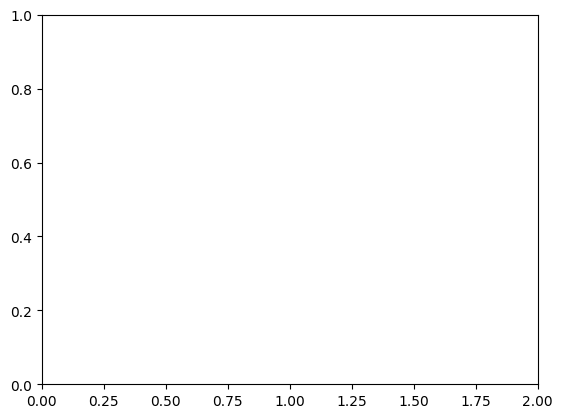

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4158: error: (-215:Assertion failed) !dsize.empty() in function 'cv::resize'


In [13]:
ma, mi, th = 1, 10, 0.77
staff_width, staff_height = staff_img.shape[::-1]
best_location_count = -1
best_locations = []
best_scale = 1

plt.axis([0, 2, 0, 1])
plt.show(block=False)

x = []
y = []

for scale in [i/100.0 for i in range(ma, mi + 1, 3)]:
    locations = []
    location_count = 0
    template = cv2.resize(staff_img, None,
        fx = scale, fy = scale, interpolation = cv2.INTER_CUBIC)
    result = cv2.matchTemplate(img_bw, template, cv2.TM_CCOEFF_NORMED)
    result = np.where(result >= th)
    location_count += len(result[0])
    locations += [result]
    print("scale: {0}, hits: {1}".format(scale, location_count))
    x.append(location_count)
    y.append(scale)
    plt.plot(y, x)
    plt.pause(0.00001)
    if (location_count > best_location_count):
        best_location_count = location_count
        best_locations = locations
        best_scale = scale
        plt.axis([0, 2, 0, best_location_count])
    elif (location_count < best_location_count):
        pass
plt.close()

print(best_locations, best_scale)

In [ ]:
ma, mi, th = 50, 150, 0.77
def fit(img, templates, start_percent, stop_percent, threshold):
    img_width, img_height = img.shape[::-1]
    best_location_count = -1
    best_locations = []
    best_scale = 1

    plt.axis([0, 2, 0, 1])
    plt.show(block=False)

    x = []
    y = []
    for scale in [i/100.0 for i in range(start_percent, stop_percent + 1, 3)]:
        locations = []
        location_count = 0
        for template in templates:
            template = cv2.resize(template, None,
                fx = scale, fy = scale, interpolation = cv2.INTER_CUBIC)
            result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
            result = np.where(result >= threshold)
            location_count += len(result[0])
            locations += [result]
        print("scale: {0}, hits: {1}".format(scale, location_count))
        x.append(location_count)
        y.append(scale)
        plt.plot(y, x)
        plt.pause(0.00001)
        if (location_count > best_location_count):
            best_location_count = location_count
            best_locations = locations
            best_scale = scale
            plt.axis([0, 2, 0, best_location_count])
        elif (location_count < best_location_count):
            pass
    plt.close()

    return best_locations, best_scale